# Contents

### Module 3
- Advanced Circuit Visualizations
- QASM Export/Import
- Circuit Depth
- Qiskit Version
- Backend Overview & Gate/Error Maps
- Coupling Maps
- Example Exam Questions

In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import *
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


### Advanced Circuit Visualization

Let's start with defining a rather big circuit. We will play around with visualization on this.

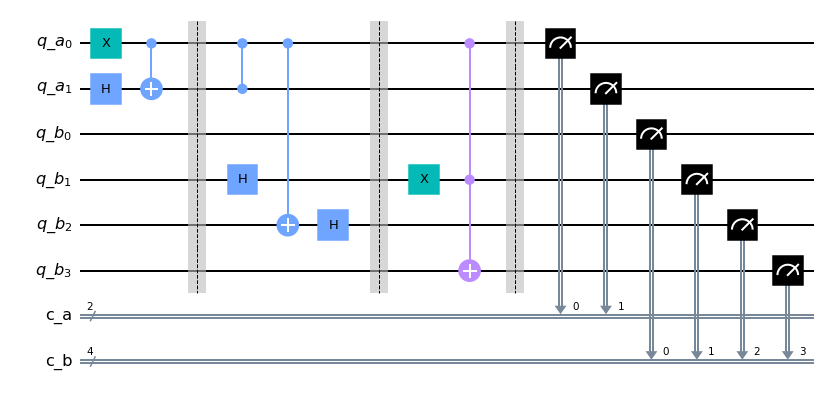

In [3]:
q_a = QuantumRegister(2, 'q_a')
q_b = QuantumRegister(4, 'q_b')
c_a = ClassicalRegister(2, 'c_a')
c_b = ClassicalRegister(4, 'c_b')

qc = QuantumCircuit(q_a, q_b, c_a, c_b)

qc.x(0)
qc.h(1)
qc.cx(0,1)
qc.barrier()
qc.cz(0,1)
qc.cx(0,4)
qc.h(3)
qc.h(4)
qc.barrier()
qc.x(3)
qc.ccx(0,3,5)
qc.barrier()
qc.measure(q_a, c_a)
qc.measure(q_b, c_b)
qc.draw()

Now that we have the circuit rolling, let's see 4 nice parameters we can use to manipulate our circuit graphics.

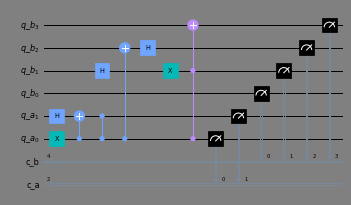

In [4]:
qc.draw(reverse_bits=True, plot_barriers=False, scale=0.5, style = {'backgroundcolor' : 'gray'})

It's also just good to keep at the back of your mind that there's actually a direct circuit drawer function instead of using the .draw() on the circuit.

In [6]:
from qiskit.tools.visualization import circuit_drawer
circuit_drawer(qc, output='text')

┌───┐      ░                 ░            ░ ┌─┐               
q_a_0: ┤ X ├──■───░───■────■────────░────────■───░─┤M├───────────────
       ├───┤┌─┴─┐ ░   │    │        ░        │   ░ └╥┘┌─┐            
q_a_1: ┤ H ├┤ X ├─░───■────┼────────░────────┼───░──╫─┤M├────────────
       └───┘└───┘ ░        │        ░        │   ░  ║ └╥┘┌─┐         
q_b_0: ───────────░────────┼────────░────────┼───░──╫──╫─┤M├─────────
                  ░ ┌───┐  │        ░ ┌───┐  │   ░  ║  ║ └╥┘┌─┐      
q_b_1: ───────────░─┤ H ├──┼────────░─┤ X ├──■───░──╫──╫──╫─┤M├──────
                  ░ └───┘┌─┴─┐┌───┐ ░ └───┘  │   ░  ║  ║  ║ └╥┘┌─┐   
q_b_2: ───────────░──────┤ X ├┤ H ├─░────────┼───░──╫──╫──╫──╫─┤M├───
                  ░      └───┘└───┘ ░      ┌─┴─┐ ░  ║  ║  ║  ║ └╥┘┌─┐
q_b_3: ───────────░─────────────────░──────┤ X ├─░──╫──╫──╫──╫──╫─┤M├
                  ░                 ░      └───┘ ░  ║  ║  ║  ║  ║ └╥┘
c_a_0: ═════════════════════════════════════════════╩══╬══╬══╬══╬══╬═
                                                       ║  ║  ║  ║  ║ 
c_a_1: ════════════════════════════════════════════════╩══╬══╬══╬══╬═
                                                          ║  ║  ║  ║ 
c_b_0: ═══════════════════════════════════════════════════╩══╬══╬══╬═
                                                             ║  ║  ║ 
c_b_1: ══════════════════════════════════════════════════════╩══╬══╬═
                                                                ║  ║ 
c_b_2: ═════════════════════════════════════════════════════════╩══╬═
                                                                   ║ 
c_b_3: ════════════════════════════════════════════════════════════╩═

### QASM Export/Import

We've done a lot of simulating with QASM in Module 2. Let's now see how we can export to and import from QASM files. This is useful for projects which utilize coding in multiple Quantum SDKs, so that everyone can universally share circuits they have created in one standard form, that is QASM. Let's demonstrate how we can achieve this within Qiskit by creating a GHZ circuit.

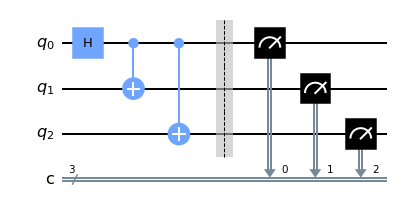

In [7]:
qc = QuantumCircuit(3,3)
qc.h(0)
qc.cx(0,1)
qc.cx(0,2)
qc.barrier()
qc.measure([0,1,2], [0,1,2])
qc.draw()

Now that we have our circuit, all we have to do is use .qasm() on it to create a QASM string. As easy as that!

In [8]:
qasm_str = qc.qasm()
qasm_str

'OPENQASM 2.0;\ninclude "qelib1.inc";\nqreg q[3];\ncreg c[3];\nh q[0];\ncx q[0],q[1];\ncx q[0],q[2];\nbarrier q[0],q[1],q[2];\nmeasure q[0] -> c[0];\nmeasure q[1] -> c[1];\nmeasure q[2] -> c[2];\n'

Voila! We now have a QASM string that can be directly used. Let's also import it to double-check it worked.

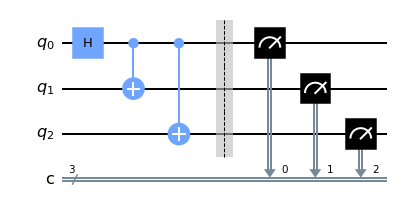

In [9]:
circ = QuantumCircuit.from_qasm_str(qasm_str)
circ.draw()

It indeed works correctly.

### Circuit Depth

We will now see how to obtain depth of a circuit and how a barrier changes things.

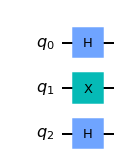

In [11]:
circ = QuantumCircuit(3)
circ.h(0)
circ.x(1)
circ.h(2)
circ.draw()

We can directly call the .depth() method to print out the depth of this circuit.

In [12]:
circ.depth()

1

As expected, the depth is 1. Let's now add a barrier to the middle of the circuit and see what happens.

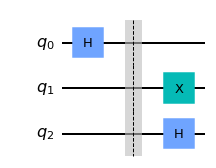

In [13]:
circ = QuantumCircuit(3)
circ.h(0)
circ.barrier()
circ.x(1)
circ.h(2)
circ.draw()

In [14]:
circ.depth()

2

This is a direct demonstration of what we've talked in Module 2 about Barriers. The barrier not only acts as a visual seperator to keep your circuits looking clean, but also a directive for the backends to execute the circuit in batches. Since we have a barrier mid-circuit here, we created 2 batches and the circuit depth has become 2.

### Qiskit Version

Are you having problems with some packages you're using along with Qiskit? Are you getting weird error messages?
First thing to check is your Qiskit version in such a case. It's very simple.

In [15]:
import qiskit
qiskit.__version__

'0.22.0'

### Backend Overview & Gate/Error Maps

We've seen before that we can simply go to our Dashboard and check which machines are available to us.
Now let's see a more conveninent way of checking which machines are available to us directly from our notebook environment.

In [16]:
import qiskit.tools.jupyter
%qiskit_backend_overview

That already gives us a good overview, but what if we required more specific information about the couplings within the chip and their specific specs. Error rates depend very much on fabrication, and even within the same chip we can have different two qubit gate error rates between different qubits. When running experiments on real devices, it's always good practice to get as much information about the chip you will be using and use the two qubits with lowest error rates if it's possible.

First of all, let's print out a specific chip we'd like to use.

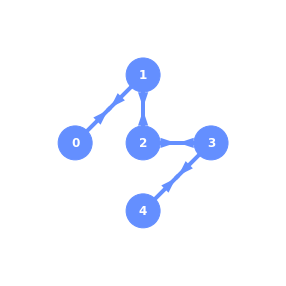

In [17]:
from qiskit.visualization import plot_gate_map
backend = provider.get_backend('ibmq_manila')
plot_gate_map(backend, plot_directed=True)

Then, let's obtain the error information.

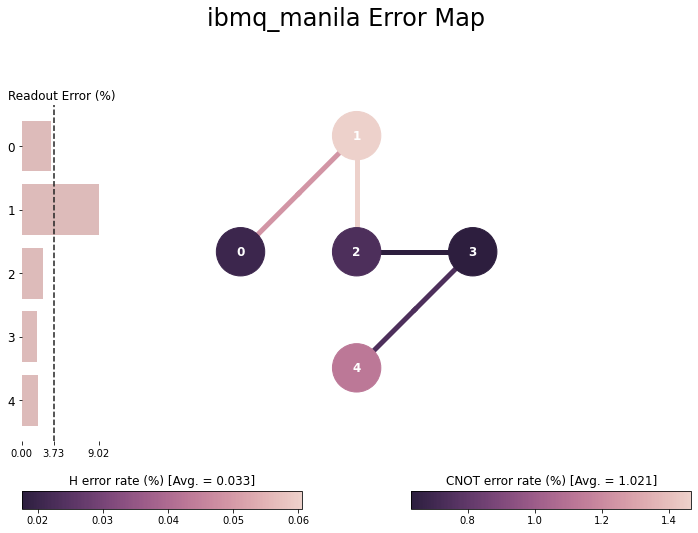

In [18]:
plot_error_map(backend)

### Coupling Maps

Another interesting concept within Qiskit is to explicitly define a coupling map for running a simulation. It is usually used to model the hardware constraints, however we can demonstrate it on the QASM simulator and tell it what kind of a chip emulation we want. For example let's have a 3 qubit code with a linear chain of qubits. This is

In [19]:
qc = QuantumCircuit(3)
qc.measure_all()
sim = BasicAer.get_backend('qasm_simulator')
couple_map = [[0,1],[1,2]]
job = execute(qc, sim, shots=1000, coupling_map=couple_map)
result = job.result()
counts = result.get_counts()
print(counts)

{'000': 1000}


In [20]:
couple_map

[[0, 1], [1, 2]]

That's it! Let's now do a recap of everything and take a look at some of the sample exam questions :)